<div style='width=100%; display:flex;flex-direction:row'><img  src=https://universidadeuropea.com/resources/media/images/universidad-europea-logo_poc9mEM.original.png width=100  style='  margin-left: auto;margin-right: auto; width: 25%; height:25%;'><img  src=https://i.ibb.co/1068C7j/EATEASER.jpg width=100 style='  margin-left: auto;margin-right: auto; width: 10%;height:25%;'></div>

<div style='margin:auto;text-align: center;font-family: "Times New Roman", Times, serif; font-weight: bold;'>PROYECTO COMUTACIONAL<br><br>EATEASER - VOZ A TEXTO</div>

<div style='width:100%; display:flex;flex-direction:row'>
    <div style='width:50%;margin-right:5cm;'>
        <p style='font-family: "Times New Roman", Times, serif; font-weight: bold;'>ESTUDIANTES</p>
<ul style='font-family: "Times New Roman", Times, serif;'>
    <li>Adilem Dobras 21911633</li><li>Roberto Echevarria 21823680</li><li>Carlos Gonzales 22067726</li><li>Juan Carlos Rondeau 21816176</li></ul> </div>

</div>

<h2 style="font-size: 19px;color:#6DA0FF;font-family:Georgia, Times, 'Times New Roman', serif;letter-spacing: 3px;font-weight: normal">1. Importamos las librerias</h2>

In [1]:
"""
!pip install pytube
!pip install SpeechRecognition
!pip install pydub
!pip install moviepy
!pip install beautifulsoup4
!pip install nltk
"""

'\n!pip install pytube\n!pip install SpeechRecognition\n!pip install pydub\n!pip install moviepy\n!pip install beautifulsoup4\n!pip install nltk\n'

In [1]:
from pytube import YouTube
import speech_recognition as sr
from pydub import AudioSegment
import moviepy.editor as mp
from bs4 import BeautifulSoup
import glob
import os
import re
from os import listdir
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import requests
from pydub.silence import split_on_silence

C:\Users\pitu\anaconda3\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


<h2 style="font-size: 19px;color:#6DA0FF;font-family:Georgia, Times, 'Times New Roman', serif;letter-spacing: 3px;font-weight: normal">2. Inicio del programa</h2>

<h3  style='font-family: "Times New Roman", Times, serif; font-weight: bold;text-align:center;font-size:14px'>CLASE CONTROLADORVIDEO</h3><p style='font-family: "Times New Roman", Times, serif; font-size:14px'>En esta clase se realizará los ajustes para manejar el video recibido y manipularlo.</p>


In [2]:
class ControladorVideo:
    def __init__(self,enlace): 
        self._idvideo = 0
        self.enlacevideo=enlace
        self.yt=YouTube(self.enlacevideo)
        self.nombrevideo=''
        self.titulovideo=self.yt.title
        self.autorvideo=self.yt.author
        self.fechavideo=self.yt.publish_date
        self.duracionvideo=self.yt.length
    """|DESCARGAR VIDEO URL: descarga el video de youtube
       |return: devuelve una ruta absoluta"""
    def descargarVideoURL(self):
        recetasVideos = 'recetasvideos/'
        #aqui creo un nuevo id para el nuevo video
        self._idvideo= self._idvideo+1
        #esta sera el archivo del video y su nuevo nombre
        nombre='receta'+str(self._idvideo)
        #le pedimos al pytube que solo nos descargue el audio y lo descargamos
        t=self.yt.streams.filter(file_extension='mp4').first().download(output_path=recetasVideos,filename=nombre+'.mp4')
        #devolvemos el nombre
        return nombre
    """|PARSEO VIDEO: pasa el video de .mp4 a .wav
       |nombre: es un string que se colocara el nombre del video
       |return: devuelve el nuevo nombre del audio en .wav"""
    def parseoVideo(self,nombre):
        recetasVideos = 'recetasvideos/'
        #tomamos el video en mp4 
        track = mp.VideoFileClip(recetasVideos+nombre+'.mp4')
        #cambiamos el video a .wav
        nombre_wav="{}.wav".format(nombre)
        track.audio.write_audiofile(recetasVideos+nombre_wav)
        track.close()
        return nombre+'.wav'
   # def reenumerar(): """ EN PROCESO, para leer el directorio y añadir receta n + 1 """
       # dir = []
        #for archivo in listdir("./recetasvideos"):
        #    dir.append(archivo)
        #print(dir)
    """|SPEECH TEXT:Transforma el audio a texto
       |nombre: es un string que se colocara el nombre del video
       |return: devuelve un string con el texto devuelto"""
    def speech_text(self,nombre):
        recetasVideos = 'recetasvideos/'
        #instanciamos el recognizer
        print(recetasVideos+nombre)
        r = sr.Recognizer()
        audio = sr.AudioFile(recetasVideos+nombre)
        with audio as source:
            audio_file = r.record(source)
        #transcribimos el audio a texto
        result = r.recognize_google(audio_file, language = 'es-ES')
        return result
            
        
        

<h3  style='font-family: "Times New Roman", Times, serif; font-weight: bold;text-align:center;font-size:14px'>CLASE DEPURADOR</h3><p style='font-family: "Times New Roman", Times, serif; font-size:14px'>En esta clase se realizará el proceso de extraccion, transformacion y carga de nuestro programa EATEASER.</p>


In [3]:
#si el video es mayor de 3 minutos no funciona
#si el video es en ingles no funciona
class Depurador:
    def __init__(self): 
        self.rec=RecursosAdicionales()
    """|EXTRACCION: proceso etl donde extraemos al informacion del video 
       |enlace: es un string que se colocara el enlace del video"""
    def extraccion(self,enlace):
        #instanciamos el controlador de videos
        cv=ControladorVideo(enlace)
        #paso 1: descargamos el video
        cv.nombrevideo=cv.descargarVideoURL()
        #paso 2: pasamos el video a .wav
        nombre=cv.parseoVideo(cv.nombrevideo)
        #paso 3: pasamos el .wav a texto
        result=cv.speech_text(nombre)
        #paso 4: escribimos el texto recibido en un txt
        #print("Titulo:"+cv.titulovideo+"\n"+"Autor:"+cv.autorvideo+"\n"+"Fecha Publicacion:"+str(cv.fechavideo)+"\n"+"Entradilla:"+result)
        resultado=self.rec.escritura(cv.nombrevideo,"Titulo:"+cv.titulovideo+"\n"+"Autor:"+cv.autorvideo+"\n"+"Fecha Publicacion:"+str(cv.fechavideo)+"\n"+"Entradilla:"+result)
        #paso 5: eliminamos los mp4
        #self.rec.eliminacionMp4()
        #resultado=print(cv.nombrevideo,"Titulo:"+cv.titulovideo+"\n"+"Autor:"+cv.autorvideo+"\n"+"Fecha Publicacion:"+str(cv.fechavideo)+"\n"+"Entradilla:"+result)
        return resultado     
    def transformacion(self):
        print()
    def carga(self):
        print()

In [4]:
#aqui iran lecturas-escrituras-guardar-eliminar cosas en bases de datos
class RecursosAdicionales:
    """|ESCRITURA: escribe textos txt
       |nombre: nombre del 
       |return: devuelve el audio en texto"""
    #yo siento que en vez de cambiar de carpeta los textos...deberiamos eliminar los mp4
    #y si lo mas factible aqui es que guardemos el video por su nombre?
    #creo que no debemos contar los files porque cansan el programa
    
    def escritura(self,nombre,texto):
        recetasTextos = 'recetastextos/'
        if not(os.path.exists(recetasTextos)):
            os.mkdir(recetasTextos)
        f = open(recetasTextos+nombre+'.txt', 'w')
        f.write(texto)
        f = open(recetasTextos+nombre+'.txt', "r")
        print(f.read())
        f.close()
    def eliminacionMp4(self):
        recetasVideos = './recetasvideos/'
        py_files = glob.glob(recetasVideos+'*.mp4')
        for py_file in py_files:
            try:
                os.remove(py_file)
            except OSError as e:
                print(f"Error:{ e.strerror}")      
        

In [5]:
class WebScrap:
    def __init__(self): 
        self.headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
    def request(self, url):
        request1 = requests.get(url, headers=self.headers)
        html = request1.content
        soup = BeautifulSoup(html, 'html.parser')
        return soup
    def verificar_alimento(self,alimento):
        soup = self.request( 'https://www.themealdb.com/api/json/v1/1/search.php?s='+alimento)
        print(soup)
        

<h2 style="font-size: 19px;color:#6DA0FF;font-family:Georgia, Times, 'Times New Roman', serif;letter-spacing: 3px;font-weight: normal">3. Main</h2>

In [7]:
#y si tambien vemos si le permitimos al usuario que meta videos?
dep=Depurador()
if __name__ == '__main__':
    #dep.extraccion('https://www.youtube.com/watch?v=6PzQY1E2s2g&list=PLxHmjpcgU5ArC2rY5cpoIcZoVKB_0UHfR&ab_channel=PlatosF%C3%A1cilesconTamara')
    #dep.extraccion('https://www.youtube.com/watch?v=PsqR5M8rdjA&list=LL&index=9&t=4s')
    #dep.extraccion('https://www.youtube.com/watch?v=xfYcM_jHgPY')
    dep.extraccion('https://www.youtube.com/watch?v=DnamuF14sJ0')
    

chunk:   0%|                                                                        | 0/4670 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in recetasvideos/receta1.wav


MoviePy - Done.
recetasvideos/receta1.wav
Titulo:Sopa de Cebolla | Una riquísima receta muy Fácil y Rápida de hacer
Autor:Cocina con Carmen
Fecha Publicacion:2019-12-20 00:00:00
Entradilla:hola a todos y bienvenidos a cocina con Carmen hoy vamos a hacer una deliciosa sopa de cebolla que es súper fácil y rápida de hacer y además es genial para que el cuerpo entre en calor así que si queréis hacer la os dejo los ingredientes abajo en la descripción y al final del vídeo y vamos a comenzar para hacer la sopa de cebolla usaré como ingrediente principal un litro de este caldo de pollo Aneto que está riquísimo yo fui hace poco a su fábrica y la única diferencia que hay con los caldos que hacemos en casa son las ollas que nosotros utilizamos unas ollas pequeñas y ellos utilizan unas ollas que caben unos 3 ml que lo recordar seguido también vamos a necesitar medio kg de cebolla que si son dulces mucho mejor comenzaremos cortando las por la mitad y cada mitad las cortaremos y Juliana cuando haya

In [15]:
!pip install numba

In [29]:
!pip install librosa


In [6]:
import librosa 


In [146]:
y , sr = librosa.load("recetasvideos/receta1.wav")

In [10]:
duracion=float(len(y)/sr)
duracion

211.77002267573695

In [147]:
import matplotlib.pyplot as plt 
import librosa.display

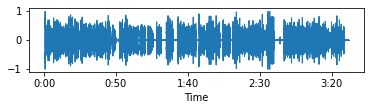

In [149]:
plt.figure()
plt.subplot(3,1,1)
librosa.display.waveshow(y,sr=sr)
plt.show()


In [60]:
type(y)


numpy.ndarray

In [49]:
y[y>0.0]

array([1.2358456e-11, 8.8294344e-11, 2.9518646e-10, ..., 8.4092680e-05,
       6.4697474e-06, 1.8525194e-05], dtype=float32)

In [57]:

audio=[]
for i in range(len(y)):
    if y[i]>=0.01:
        audio.append(y[i])

In [62]:
import numpy as np
arr=np.array(audio)

In [63]:
type(arr)

numpy.ndarray

In [66]:
min(arr)

0.010000005

In [67]:
min(y)

-1.005426

In [68]:
len(y)/sr

211.77002267573695

In [71]:
len(y)/211.77002267573695

22050.0

In [65]:
from pydub import AudioSegment as aseg




In [105]:
audio1=aseg.from_wav("./recetasvideos/receta1.wav")
tiempo=10 * 1000
extr = audio1[:tiempo]
#extr.export("pimerosSegundos.wav",format="wav")
print(type(extr))

<class 'pydub.audio_segment.AudioSegment'>


In [34]:
print(a[1])

In [106]:


# this is an array
samples = audio1.get_array_of_samples()





In [90]:
import numpy as np
lista1=samples.tolist()
array1=np.array(lista1)

In [56]:
arr2.export("pruebamala.wav",format="wav")

AttributeError: 'list' object has no attribute 'export'

In [55]:
new_sound = sound._spawn(array1)

NameError: name 'mean' is not defined

In [88]:
audio1=aseg.from_wav("./recetasvideos/receta1.wav")

In [74]:
suma=0
for i in lista1:
    suma=suma+abs(i)
media=suma/len(lista1)

In [75]:
media

2088.6368606594865

In [73]:
yuy=abs(lista1)

TypeError: bad operand type for abs(): 'list'

In [97]:
nuevalista=[]
for i in lista1:
    if i<-10:
        nuevalista.append(i)
    if i>10:
        nuevalista.append(i)

        

In [79]:
type(nuevalista)

list

In [104]:
len(lista1)

18678114

In [96]:
len(nuevalista)

13099070

In [98]:
nuevalistaArr=np.array(nuevalista)

In [101]:
nuevalistaArr=np.array(lista1)

In [84]:
nuevalistaArr.export("pruebamala2.wav",format="wav")

AttributeError: 'numpy.ndarray' object has no attribute 'export'

In [107]:
new_sound = audio1._spawn(nuevalistaArr)

In [109]:
audio1.export("pruebamala5.wav",format="wav")

<_io.BufferedRandom name='pruebamala5.wav'>

In [110]:
type(new_sound)

pydub.audio_segment.AudioSegment

In [138]:
import numpy as np
from pydub import AudioSegment as aseg

In [139]:
audio1=aseg.from_wav("./recetasvideos/receta1.wav")

# this is an array
samples = audio1.get_array_of_samples()

In [ ]:


audio1=aseg.from_wav("./recetasvideos/receta1.wav")

# this is an array
samples = audio1.get_array_of_samples()

lista1=samples.tolist()

nuevalista=[]
for i in lista1:
    if i<-10:
        nuevalista.append(i)
    if i>10:
        nuevalista.append(i)
        
nuevalistaArr=np.array(nuevalista)

new_sound = audio1._spawn(nuevalistaArr)

audio1.export("pruebamala5.wav",format="wav")


In [126]:
import numpy as np
from pydub import AudioSegment as aseg

audio1=aseg.from_wav("./recetasvideos/receta1.wav")

# this is an array
samples = audio1.get_array_of_samples()

nuevalista=np.array
for i in samples:
    nuevalista.extend(i)

        
new_sound = audio1._spawn(hola)

new_sound.export("pruebamala10.wav",format="wav")


<_io.BufferedRandom name='pruebamala10.wav'>

In [150]:

index=[]
for i in range(len(samples)):
    if -500<=samples[i]<=500:
        index.append(i)


    

In [151]:
len(samples)

10987289

In [142]:
len(index)

7690825

In [172]:
import numpy as np
from pydub import AudioSegment as aseg

audio1=aseg.from_wav("./recetasvideos/receta1.wav")
# this is an array
samples = audio1.get_array_of_samples()

print(len(samples))

index=[]
for i in range(len(samples)):
    if -10<=samples[i]<=10:
        index.append(i)
print("ya está creado el index")
print(len(index))
np.delete(samples, index, axis=None)
#importante el -1 para que se borre el elemento adecuado
i=0
for j in range(len(index)):
    i=i+1
    if j==0:
        samples.pop(index[j])
    else:
        samples.pop(index[j]-i)
    if i%10000==0:
        print(i)

new_sound = audio1._spawn(samples)

new_sound.export("pruebamala12.wav",format="wav")

18678114
ya está creado el index
619595
10000
20000
30000
40000
50000
60000
70000
80000
90000


KeyboardInterrupt: 

In [198]:
import numpy as np
from pydub import AudioSegment as aseg

audio1=aseg.from_wav("./recetasvideos/receta1.wav")
# this is an array
samples = audio1.get_array_of_samples()
tiempo = int(audio1.duration_seconds)*1000
print(len(samples))

aux=samples
for i in range(len(aux)):
    if -50<=aux[i]<=50:
        samples.append(aux[i])
        


new_sound = audio1._spawn(samples)
new_sound2=audio1[:10000]
new_sound.export("pruebamala13.wav",format="wav")

18678114


<_io.BufferedRandom name='pruebamala13.wav'>

In [210]:
# esta es la función buena. Aún hace falta implementar un par de cosas. Lo haré cuando pueda

import numpy as np
from pydub import AudioSegment as aseg

audio1=aseg.from_wav("./recetasvideos/receta1.wav")
# this is an array
samples = audio1.get_array_of_samples()

print(len(samples))

index=[]
for i in range(len(samples)):
    if -75<=samples[i]<=75:
        index.append(i)
        
print("ya está creado el index")
print(len(index))

samples=np.delete(samples, index, axis=0)
print(len(samples))
new_sound = audio1._spawn(samples)
new_sound.export("pruebamala14.wav",format="wav")

18678114
ya está creado el index
3357630
15320484


<_io.BufferedRandom name='pruebamala14.wav'>

In [67]:
# esta es la función buena. Aún hace falta implementar un par de cosas. Lo haré cuando pueda
def segcionarXsilencios():
    import numpy as np
    from pydub import AudioSegment as aseg

    audio1=aseg.from_wav("./recetasvideos/receta1.wav")
    # this is an array
    samples = audio1.get_array_of_samples()
    segundo=88521
    index=[]
    for i in range(0,len(samples),int(segundo/5)):
        dataSeg = samples[i:int(segundo/5)+i]
        media=np.mean(dataSeg)
        var=np.var(dataSeg)
        if -10<=media<=10 and var<=1900:
            index.append(i)

    print(index)
    borrar=[]
    for i in range(len(index)-1):
        if index[i+1]<=index[i]+(20*segundo):
            borrar.append(i+1)
    final=np.delete(index, borrar, axis=0) 
    print("------------------------------------------------")
    print(final)

    extractos=[]
    for i in range(len(final)):
        if i==0:

            extractos.append(samples[:final[i]])
        else:
            extractos.append(samples[final[i-1]:final[i]])

    for i in range(len(extractos)):
        new_sound = audio1._spawn(extractos[i])
        nombre="extracto{}.wav".format(i+1)
        new_sound.export(nombre,format="wav")
    

In [69]:
import random
hola=[]
for i in range(1000000):
    hola.append(random.randint(-75, 75))
adios=np.var(hola)
adios

1900.5273728407594

In [55]:
for i in range(len(extractos)):
    print(np.var(extractos[i]))

nan
15108596.88101333
14883638.534792336
8751655.845979555
21192.20384188451
10971.868435869377
13377044.465095254
9462227.905044982
6333.421377493055
8042014.246742038
5002925.649062543
5532.596550691872
7444892.345217807
6531.823463070674
6050.940354663494
16544711.665650671
4234.699022222222
5302.827108506616
3871.575418220914
14380302.30661455
11887644.001168283
6855.005733846063
14811300.942993259
17650448.58182296
7560030.406683207
3046.778940902344
10232588.339794742
4252.271785749375
15955067.03353559
4152.826176578231
3110.8993823317865
3378.259064962805
529342.3549877212
2922.1233470486113
4538.430361817952
4752.657485628857
14123426.69278463
8265.149413273673
3793.617328785395
5454.970253513313
4504.057950289941


C:\Users\pitu\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3583: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\pitu\anaconda3\lib\site-packages\numpy\core\_methods.py:185: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
C:\Users\pitu\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [59]:
len(samples)/211

88521.8672985782

In [193]:
samples2=samples[:10000]

new_sound = audio1._spawn(samples2)

new_sound.export("pruebamala12.wav",format="wav")

<_io.BufferedRandom name='pruebamala12.wav'>

In [145]:
new_sound = audio1._spawn(samples)

new_sound.export("pruebamala12.wav",format="wav")

<_io.BufferedRandom name='pruebamala12.wav'>